<a href="https://colab.research.google.com/github/kpjaskie/SenSIP-IRES2020/blob/master/Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Algorithms

In this notebook, we will be performing different classification algorithms for comparison on simulated and real-world datasets.

In statistics and machine learning, classification is the problem of identifying to which of a set of categories or classes a new observation belongs.  This is done by creating a model from data whose class membership is known.  When the data belongs to one of two classes, this is refered to as **binary classification**.  When there are more than two classes represented,, this is called **multi-class classification**.

Examples of **binary classification** include determining whether an email is "spam" or "non-spam" or determining if a patient "is pregnant" or "is not pregnant".

Examples of **multi-class classification** include determening what is causing a patients illness (out of many possible diseases) based on observed characteristics of the patien (sex, blood pressure, presence or absence of certain symptoms, etc.) or identifying an animal, plant, or make and model of vehicle in a photograph.

![picture](https://miro.medium.com/max/972/1*SwXHlCzh-d9UqHOglp3vcA.png)

In this tutorial, we will mostly focus on binary classification using simulated datasets.  However, we will introduce some real-world examples towards the end.


In [69]:
# First, we need to import the relavent libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# To create confusion matrices and metrics
from sklearn.metrics import confusion_matrix

import seaborn as sns; sns.set()  # for plotting confusion matrices
from tabulate import tabulate


# Generate Data

Let's make some simulated data to work with.  As mentioned above, we will start with only two classes so that we can perform binary classification.  In binary classification, we often name the classes "positive" and "negative".  If one of the classes is smaller than the other, it is typically called the positive class.

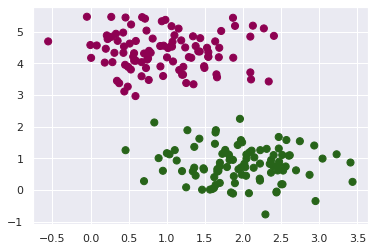

In [94]:
from sklearn.datasets import make_blobs

#Let's make some training data
X_sim_train, y_sim_train = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X_sim_train[:, 0], X_sim_train[:, 1], c=y_sim_train, s=50, cmap='PiYG');

From this, we can clearly see the two well defined classes of data - red and green.



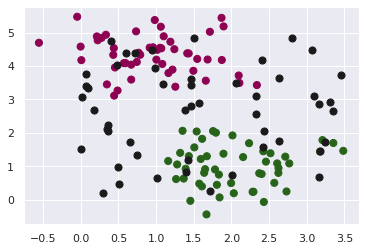

In [71]:
# generate random floating point values
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(1)
# generate random numbers
X_sim_test = np.random.random((50,2))
X_sim_test[:,0] = 3.5 * X_sim_test[:,0]
X_sim_test[:,1] = 5 * X_sim_test[:,1]

plt.scatter(X_sim_train[:, 0], X_sim_train[:, 1], c=y_sim_train, s=50, cmap='PiYG');
plt.scatter(X_sim_test[:, 0], X_sim_test[:, 1], c='k', s=50);

# Evaluating a Classification Algorithm

Before we begin working with classification algorithms, we need to introduce some of the standard classification evaluation techniques so we will be able to differentiate a good classification model from a bad one.

We will discuss:
* Confusion Matrices
* Metrics including Accuracy, Recall, Precision, and F-score (also called the F1-score).


## Confusion Matrices

Machine Learning practitioners' first tool for evaluating classification models is to generate and inspect the confusion matrix.  A confusion matrix for a binary classification problem has two rows and two columns. The real answers often depicted as the columns and the model predicted answers are given as the rows, but this is not always true - you have to look at the axis labels to be sure.
<br/><br/>

The image below depicts a confusion matrix for a pregnancy test.  A real confusion matrix will have numbers in each cell showing how many data samples your classification model classified into each category: True Positives (TP), False Positives (FP), False Negatives (FN), or True Negatives (TN).

<div>
<img src="http://drive.google.com/uc?export=view&id=1qAFkAshy_JCGORVioC1sMaVZXKVLsJLn" width="600"/>
</div>





Ideally, we'd like to have a confusion matrix where the True Positives and True Negatives were high and the False Positives and False Negatives were low.  When this is true, the diagnonal from top left to bottom right would have large numbers and everywhere else would be low.
<br/><br/>
**IMPORTANT: The orientation of a confusion matrix is NOT standard and some places such as Wikipedia have the postives in the first row and some places like sklearn have the negatives in the first row.  You MUST read the axis to understand the confusion matrix.  In the plot below, and in future python examples, the orientation is:**

\begin{bmatrix}
TN & FP \\
FN & TP 
\end{bmatrix}


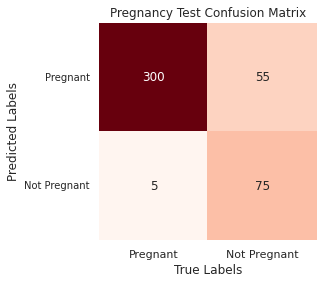

In [72]:
#@title Pregnancy Confusion Matrix Example
#@markdown The following is an example confusion matrix that has been 
#@markdown generated in Python.  Notice that the row and column
#@markdown labels have been swapped from the image above.  **It
#@markdown is important to always pay attention to these labels.**

TP_preg =  75
FP_preg =  5
FN_preg =  55
TN_preg =  300

y_real = np.concatenate((np.ones((TP_preg+FN_preg,)), 
                         np.zeros((TN_preg+FP_preg,))))
y_predicted = np.concatenate((np.ones((TP_preg,)), 
                              np.zeros((FN_preg + TN_preg,)), 
                              np.ones((FP_preg,))))

CM_example = confusion_matrix(y_real, y_predicted)

ax = sns.heatmap(CM_example.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Reds")

ax.set_xticklabels(('Pregnant','Not Pregnant'))
ax.set_yticklabels(('Pregnant','Not Pregnant'), 
    rotation=0, fontsize="10", va="center")

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Pregnancy Test Confusion Matrix")
plt.show()

## Evaluation Metrics

While the confusion matrices described above are increadibly useful in evaluating how your model is performing, sometimes it's nice to have a **summary statistic** or a single value to evaluate your model.  These are often called **metrics**.  Here, we're going to go through the most commonly used classification metrics.  These metrics all use the TP, FP, TN, and FN shown in the confusion matrix above.

### Accuracy

A model's accuracy is probably the most commonly used classification metric.  

The accuracy is calculated as:
$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} $$

This accuracy can either be calculated manually using this formula, or you can ask sklearn to calculate it for you.  

```
#Manual Calculation
accuracy = (TP + TN)/(TP + FP + TN + FN)
```

```
#Sklearn Calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_real, y_predicted)
```


### Precision and Recall

Two other important metrics that are commonly used are the Precision and the Recall.  

<center>
<div>
<img src="http://drive.google.com/uc?export=view&id=1A-x7MJeGDoQrxKXWfGZXpKoLDahUHHhq" width="700"/>
</div>
</center>

Precision and recall are important in many applications and models can be adjusted to increase one, often at the expense of the other.

* For example, when predicting a deadly disease, doctors might prefer to scare somebody with a false positive instead of missing somebody through a false negative.  In this case, having a high recall is preferred to precision.

* In other cases, such as when a credit card company declines a credit card due to suspected fraud, they're going to make their customers very unhappy if there was no fraud.  In this case, the credit card company would prefer a higher precision over a high recall.

Understanding the differences and tradeoffs between these two metrics, helps a data scientist focus on what's best for the situation.

The Precision and Recall can either be calculated manually or using sklearn.

```
#Manual Calculation
precision = TP/(TP + FP)
recall = TP/(TP + FN)
```

```
#Sklearn Calculation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_real, y_predicted)
recall = recall_score(y_real, y_predicted)
```

### F-Score

The F-score (called the F1-score in statistics) is a number between 0 and 1 that equals the harmonic mean between recall and precision.  This means that it is high when both precision and recall are high and low if either one is low.  It is often used as an alternative to accuracy.
<center>
<div>
<img src="http://drive.google.com/uc?export=view&id=1EXsN_2shynQxzJE3Lvj8yWSkX8Kb9SwD" width="300"/>
</div>
</center>

When your class sizes are pretty similar, accuracy is an extremely useful metric.  But when your class sizes are skewed (meaning they have very different sizes), the F-score is a better metric.

Example:
* Your data contains 990 negative samples and only 10 positive samples. Your classifier always predicts that everything is negative, you will have an accuracy of 99%.
* So is this a *useful* classifier?  No!  Despite having 99% accuracy, this classifier is worthless.  This is better captured by the F-score which equals zero in this scenario.

When the class sizes are the same, the accuracy and the F-score will be similar.

The F-Score can either be calculated manually or using sklearn.

```
#Manual Calculation
fscore = 2 * (precision * recall)/(precision + recall)
```

```
#Sklearn Calculation
from sklearn.metrics import f1_score
fscore = f1_score(y_real, y_predicted)
```

## Experimentation

Now that you've learned about the different classification evaluation metrics, let's play with some numbers.  For simplicity, we're going to use disease **X** diagnosis as an example.  We will define those with the disease to be  **positive** and those without to be **negative**.

Remember: 
* TP = Has **X** classified as having **X (correct)**
* FP = Does not have **X** but classified as having **X (incorrect)**
* FN = Has **X** but classified as not having **X (incorrect)**
* TN = Does not have **X** and classified as not having **X (correct)**






Metric     Value
---------  -------
Accuracy   0.94
Precision  0.94
Recall     0.96
F-score    0.95



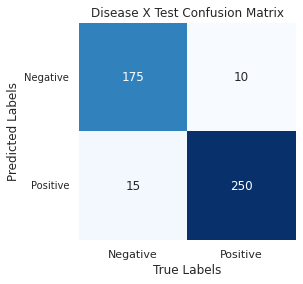

In [93]:
#@title Data

TP =  250#@param {type:"integer"}
FP =  15#@param {type:"integer"}
FN =  10#@param {type:"integer"}
TN =  175#@param {type:"integer"}

y_real = np.concatenate((np.ones((TP+FN,)), np.zeros((TN+FP,))))
y_predicted = np.concatenate((np.ones((TP,)), np.zeros((FN + TN,)), 
                              np.ones((FP,))))

#@title Results
accuracy_ex = round((TP + TN)/(TP + FP + TN + FN), 2)

if TP == 0 and FP == 0:
    precision_ex = 0
else:
    precision_ex = round(TP/(TP + FP), 2)

if TP == 0 and FN == 0:
    recall_ex = 0
else:
    recall_ex = round(TP/(TP + FN), 2)

if precision_ex == 0 and recall_ex == 0:
    fscore_ex = 0
else:
    fscore_ex = round(2 * (precision_ex * recall_ex)/(precision_ex + recall_ex), 2)

print(tabulate([['Accuracy', accuracy_ex], 
                ['Precision', precision_ex],
                ['Recall', recall_ex],
                ['F-score', fscore_ex],
                [' ', ' ']], 
               headers=['Metric', 'Value']))

CM_example = confusion_matrix(y_real, y_predicted)

ax = sns.heatmap(CM_example.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Blues")

ax.set_xticklabels(('Negative', 'Positive'))
ax.set_yticklabels(('Negative', 'Positive'), 
    rotation=0, fontsize="10", va="center")

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Disease X Test Confusion Matrix")
plt.show()

### Some Things to Try

In the data fields above, see if you can change the TP, TN, FP, FN so that you get:
1.   The accuracy to equal 75%.
2.   The precision and recall to be less than 1 but equal to one another.
3.   The F-score to be greater than the accuracy.

# Logistic Regression

When classifying data using logistic regression, the classifier will calculate the probability that each datapoint belongs to the positive class.

Logistic regression works by fitting data to a sigmoid function.  The logit sigmoid function has the following equation:

$$Sigmoid(x)=\frac{1}{1+e^{-\theta x}}$$

[[4.93357445e-02 9.50664256e-01]
 [9.71954037e-02 9.02804596e-01]
 [3.53591770e-03 9.96464082e-01]
 [1.17508993e-01 8.82491007e-01]
 [4.15353668e-01 5.84646332e-01]
 [8.02730260e-02 9.19726974e-01]
 [3.15833485e-03 9.96841665e-01]
 [4.27146916e-02 9.57285308e-01]
 [3.57350693e-01 6.42649307e-01]
 [1.67017390e-02 9.83298261e-01]
 [3.24802233e-03 9.96751978e-01]
 [5.82842572e-02 9.41715743e-01]
 [1.12651135e-02 9.88734886e-01]
 [1.86412998e-03 9.98135870e-01]
 [2.91978454e-03 9.97080215e-01]
 [3.29829613e-01 6.70170387e-01]
 [2.66632758e-01 7.33367242e-01]
 [2.65449915e-02 9.73455009e-01]
 [1.75516905e-02 9.82448309e-01]
 [1.34010539e-02 9.86598946e-01]
 [1.11859359e-01 8.88140641e-01]
 [1.36630743e-02 9.86336926e-01]
 [4.18949363e-01 5.81050637e-01]
 [1.19609736e-02 9.88039026e-01]
 [4.46178842e-03 9.95538212e-01]
 [3.73099448e-02 9.62690055e-01]
 [3.74205879e-02 9.62579412e-01]
 [9.16650702e-04 9.99083349e-01]
 [2.98480235e-03 9.97015198e-01]
 [9.39214302e-02 9.06078570e-01]
 [3.054611

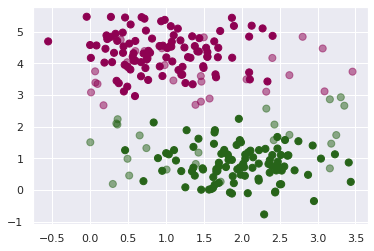

In [97]:
from sklearn.linear_model import LogisticRegression
from scipy import stats

#First, let's look at the simulated data
LR_model = LogisticRegression(random_state=0)

sim_model = LR_model.fit(X_sim_train, y_sim_train)
y_hat = sim_model.predict(X_sim_test)
prob_estimates = np.sort(sim_model.predict_proba(X_sim_test))
print(prob_estimates)


plt.figure(0)
plt.scatter(X_sim_train[:, 0], X_sim_train[:, 1], c=y_sim_train, s=50, cmap='PiYG');
plt.scatter(X_sim_test[:, 0], X_sim_test[:, 1], c=y_hat, s=50, cmap='PiYG', alpha=0.5);


In [76]:
from sklearn.metrics import plot_confusion_matrix

CM = plot_confusion_matrix(sim_model, X, X_sim_test

SyntaxError: ignored

#Support Vector Machines

A Support Vector Machine 

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='PiYG')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

#Neural Network Classifiers